<a href="https://colab.research.google.com/github/yashveersinghsohi/machine_hack_competitions/blob/multivariate_eda/Data_Science_Student_Championship/EDA/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloning Git Repo

In [3]:
# !git clone -b multivariate_eda https://github.com/yashveersinghsohi/machine_hack_competitions.git

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data

In [2]:
ROOT_DIR = '/content/machine_hack_competitions/Data_Science_Student_Championship/Competition_Files/'
train = pd.read_csv(ROOT_DIR + 'train.csv')
test = pd.read_csv(ROOT_DIR + 'test.csv')

In [3]:
def df_shapes_eda(df):
  print('SHAPE OF DF', end=' ')
  print(df.shape)
  print('-'*30)
  print('TOP FEW ROWS')
  print('-'*30)
  print(df.head())
  print('-'*30)
  print('DF INFO')
  print('-'*30)
  print(df.info())
  print('-'*30)
  print('DF NULLS')
  print('-'*30)
  print((100*(df.isna().sum()/df.shape[0])).round(3))

In [4]:
df_shapes_eda(train)

SHAPE OF DF (209673, 8)
------------------------------
TOP FEW ROWS
------------------------------
   trip_duration  distance_traveled  num_of_passengers    fare  tip  \
0          748.0               2.75                1.0   75.00   24   
1         1187.0               3.43                1.0  105.00   24   
2          730.0               3.12                1.0   71.25    0   
3          671.0               5.63                3.0   90.00    0   
4          329.0               2.09                1.0   45.00   12   

   miscellaneous_fees  total_fare  surge_applied  
0               6.300     105.300              0  
1              13.200     142.200              0  
2              26.625      97.875              1  
3               9.750      99.750              0  
4              13.200      70.200              0  
------------------------------
DF INFO
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 

In [5]:
df_shapes_eda(test)

SHAPE OF DF (89861, 8)
------------------------------
TOP FEW ROWS
------------------------------
   trip_duration  distance_traveled  num_of_passengers  fare  tip  \
0         1076.0               4.18                1.0     0    0   
1          429.0               1.48                4.0     0    0   
2          856.0               4.15                1.0     0   24   
3          622.0               3.22                1.0     0   15   
4          507.0               3.98                1.0     0    0   

   miscellaneous_fees  total_fare  surge_applied  
0              13.500           0              0  
1              13.500           0              0  
2               6.000           0              0  
3               5.625           0              0  
4               2.250           0              0  
------------------------------
DF INFO
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89861 entries, 0 to 89860
Data columns (total 8 columns):
 # 

# EDA

## Univariate EDA

In [ ]:
train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


### Helper Functions

In [ ]:
def continuous_feature_eda(data, col, detect_outliers=True, feature_std=True):
  print('Distribution of Raw Feature')
  plot_hist(df=data, col=col)
  print('-'*30)
  
  if detect_outliers:
    print('Distribution of Feature Without Outliers')
    data_wo_outliers = outlier_detection(data=data, col=col)
    plot_hist(df=data_wo_outliers, col=col)
    print('-'*30)
  
  if feature_std:
    print('Distribution of Feature After Standardization')
    data_std = standardize_data(data=data, col=col)
    plot_hist(df=data_std, col=col)
    print('-'*30)
    if detect_outliers:
      print('Distribution of Feature After Outlier Removal and Standardization')
      data_wo_outliers_std = standardize_data(data=data_wo_outliers, col=col)
      plot_hist(df=data_wo_outliers_std, col=col)
  
  return (data_wo_outliers, data_std, data_wo_outliers_std)

def plot_hist(df, col):
  fig, ax = plt.subplots(1, 2, figsize=(10, 4))
  sns.histplot(data=df, x=col, ax=ax[0], bins=500)
  sns.boxplot(data=df, x=col, ax=ax[1])
  plt.show()

def outlier_detection(data, col):
  q25 = data[col].quantile(0.25)
  q75 = data[col].quantile(0.75)
  iqr = q75-q25
  lower_iqr = q25 - (1.5*iqr)
  upper_iqr = q75 + (1.5*iqr)
  print('Lower IQR:', lower_iqr, end=' | ')
  print('IQR:', iqr, end=' | ')
  print('Upper IQR:', upper_iqr)
  print(
    '% of Outliers:', 
    round(
      ((data[
          (data[col] < lower_iqr) | 
          (data[col] > upper_iqr)
        ].shape[0]/data.shape[0])*100), 3
    )
  )
  return data[(data[col] >= lower_iqr) & (data[col] <= upper_iqr)]

def standardize_data(data, col):
  scaler = StandardScaler()
  data_std = data.copy()
  data_std[col] = scaler.fit_transform(data[col].to_numpy().reshape(-1, 1))
  return data_std

### `trip_duration`

**Train Set**

Distribution of Raw Feature


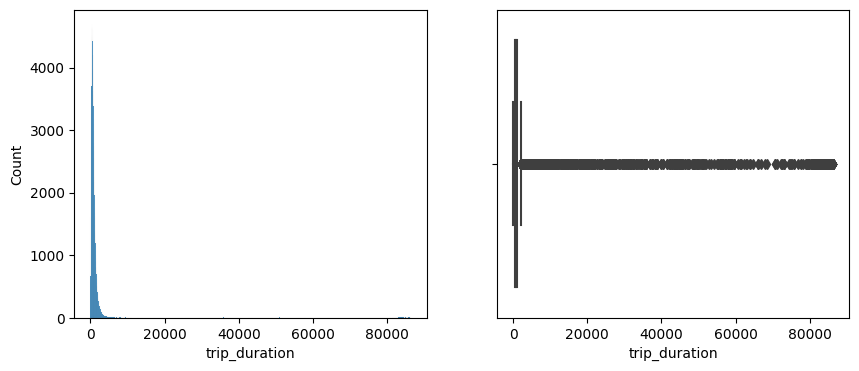

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -532.0 | IQR: 652.0 | Upper IQR: 2076.0
% of Outliers: 5.675


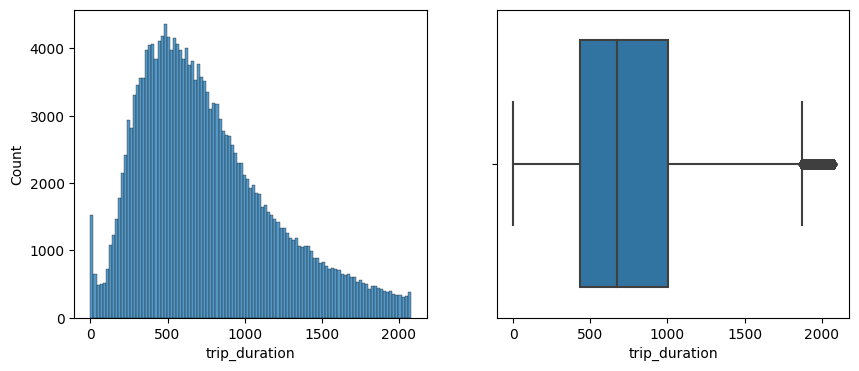

------------------------------
Distribution of Feature After Standardization


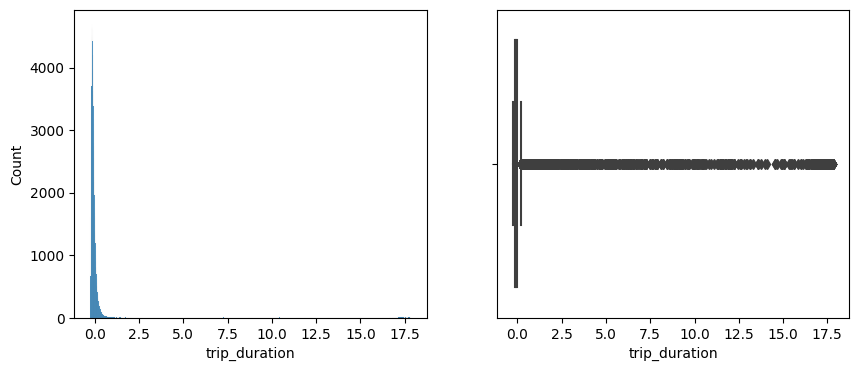

------------------------------
Distribution of Feature After Outlier Removal and Standardization


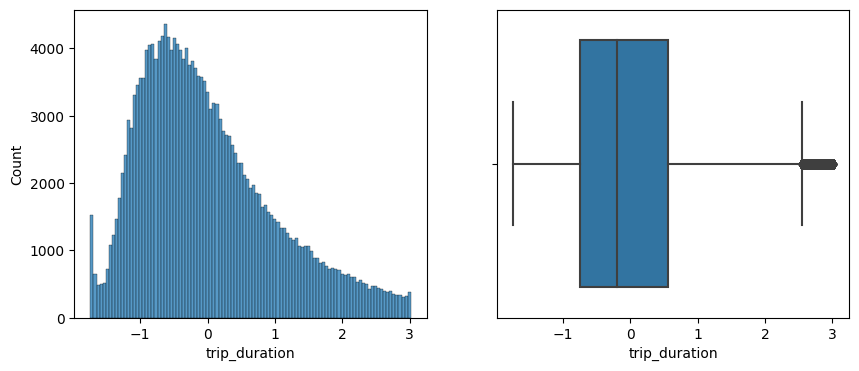

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=train, col='trip_duration')

**Test Set**

Distribution of Raw Feature


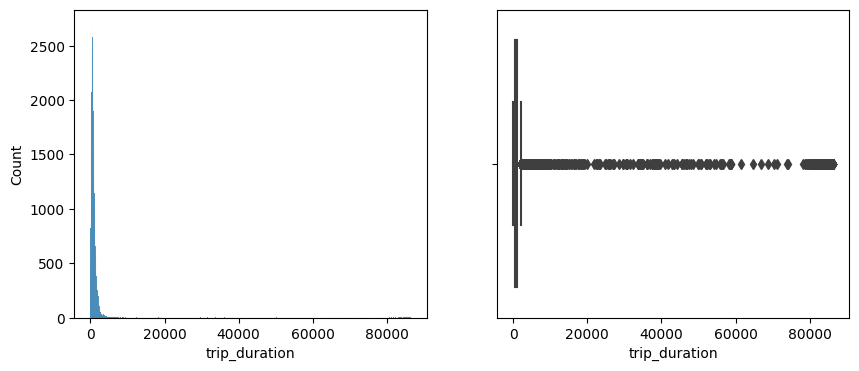

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -526.0 | IQR: 648.0 | Upper IQR: 2066.0
% of Outliers: 5.608


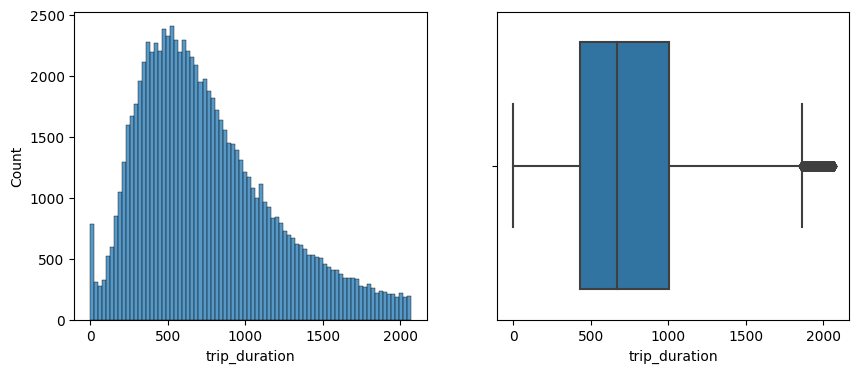

------------------------------
Distribution of Feature After Standardization


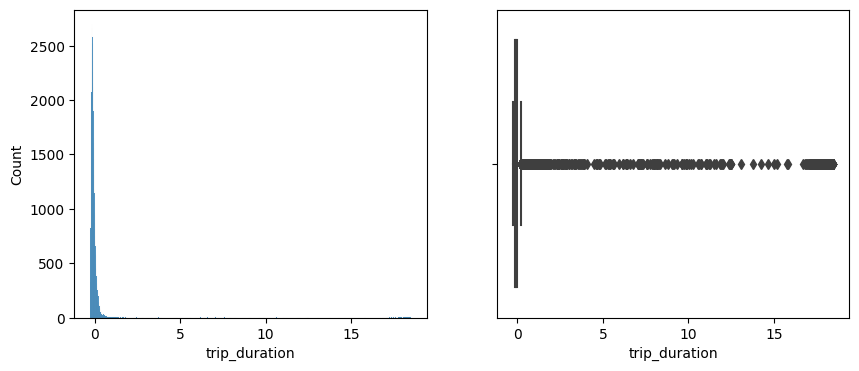

------------------------------
Distribution of Feature After Outlier Removal and Standardization


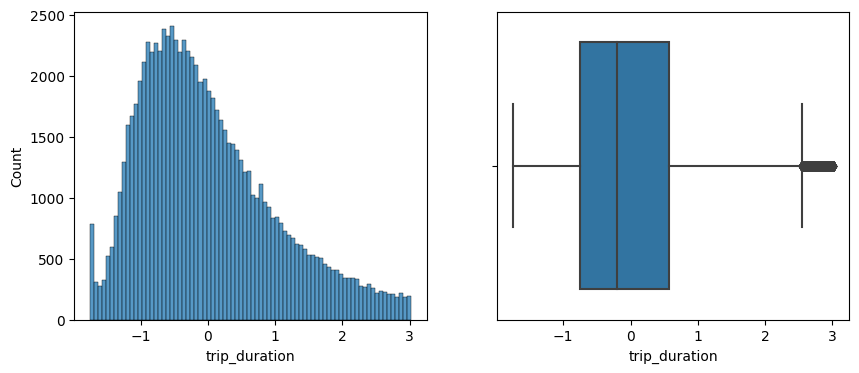

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=test, col='trip_duration')

### `distance_traveled`

**Train Set**

Distribution of Raw Feature


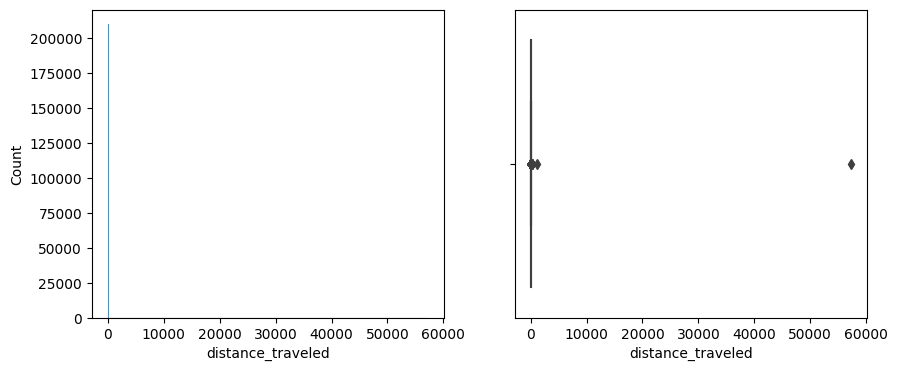

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -3.7199999999999998 | IQR: 3.7800000000000002 | Upper IQR: 11.4
% of Outliers: 8.057


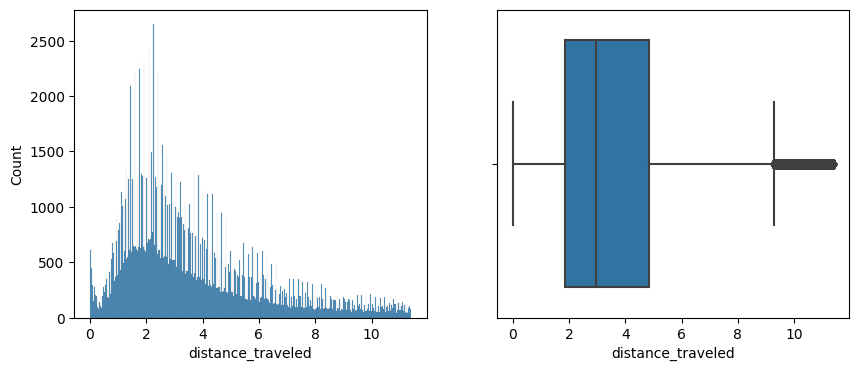

------------------------------
Distribution of Feature After Standardization


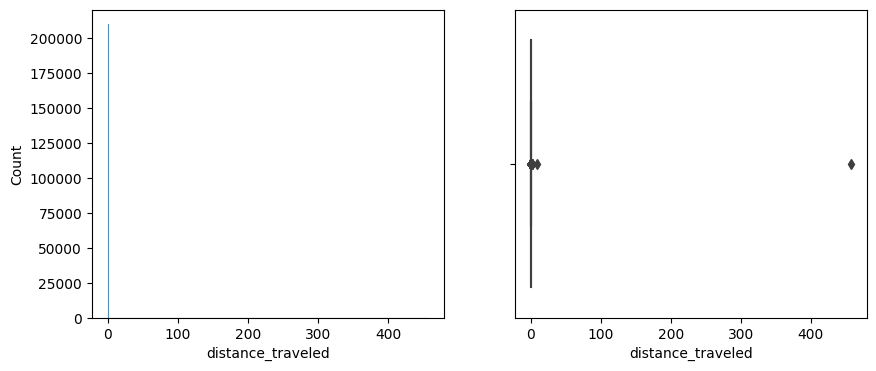

------------------------------
Distribution of Feature After Outlier Removal and Standardization


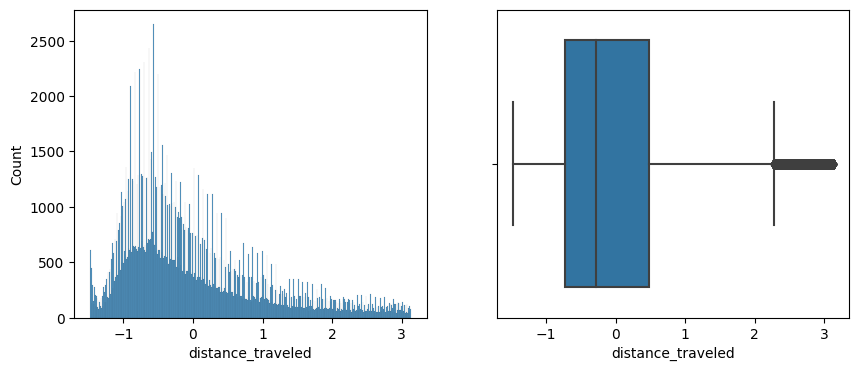

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=train, col='distance_traveled')

**Test Set**

Distribution of Raw Feature


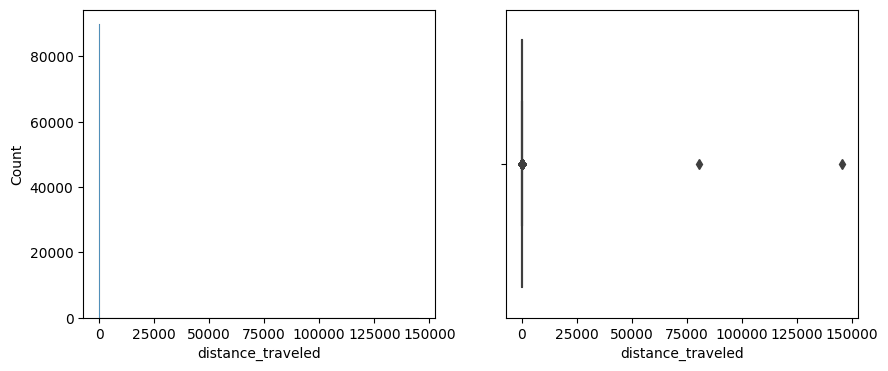

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -3.7199999999999998 | IQR: 3.7800000000000002 | Upper IQR: 11.4
% of Outliers: 7.811


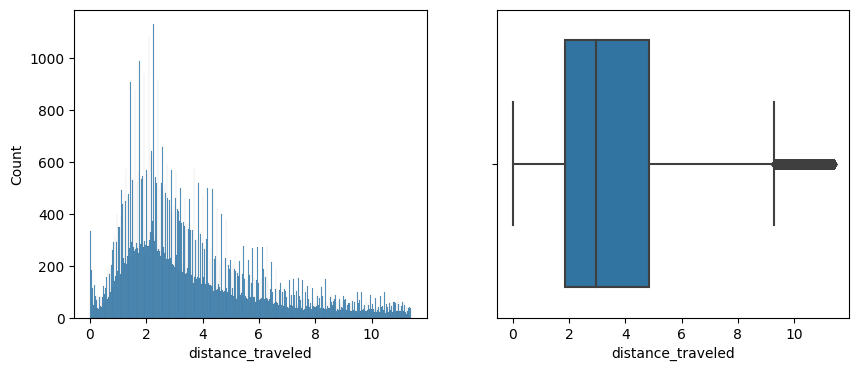

------------------------------
Distribution of Feature After Standardization


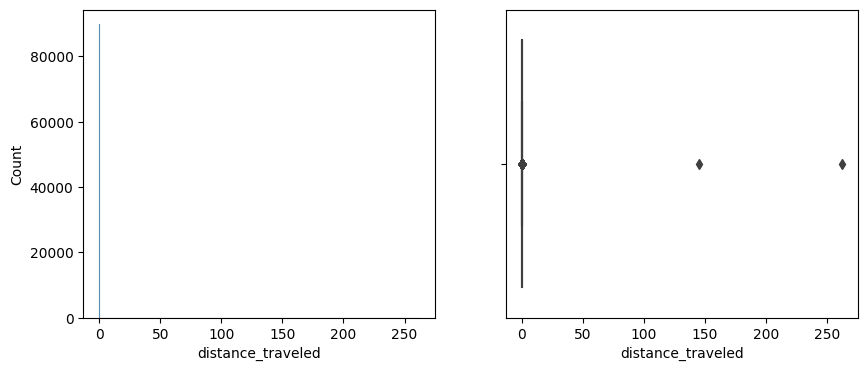

------------------------------
Distribution of Feature After Outlier Removal and Standardization


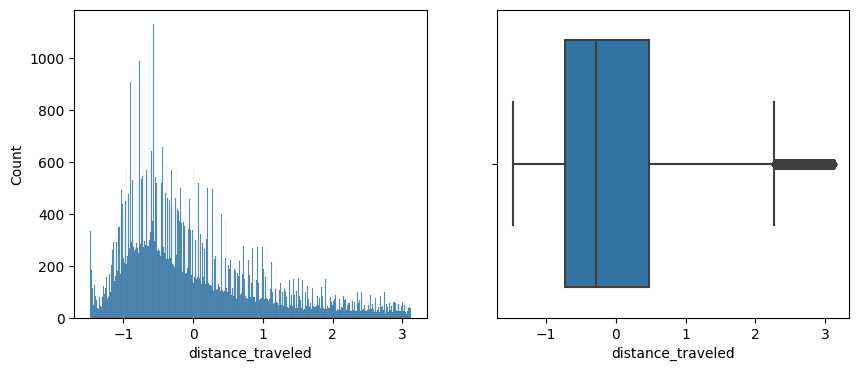

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=test, col='distance_traveled')

### `fare`

**Train Set**

Distribution of Raw Feature


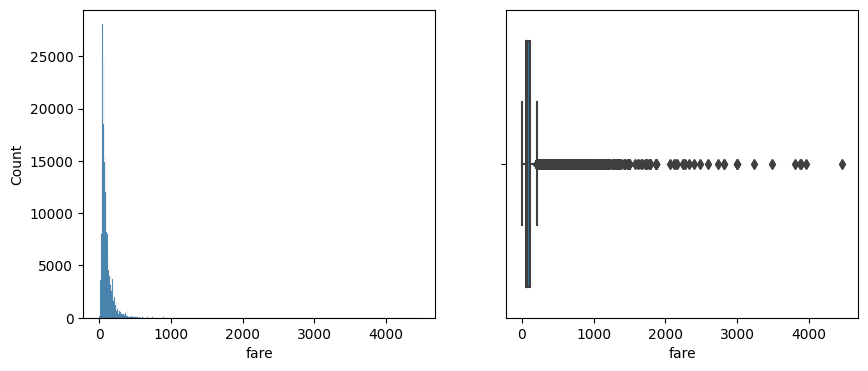

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -43.125 | IQR: 63.75 | Upper IQR: 211.875
% of Outliers: 6.497


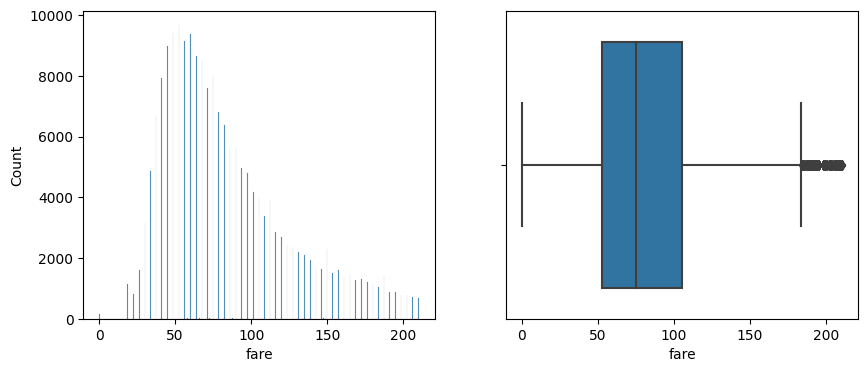

------------------------------
Distribution of Feature After Standardization


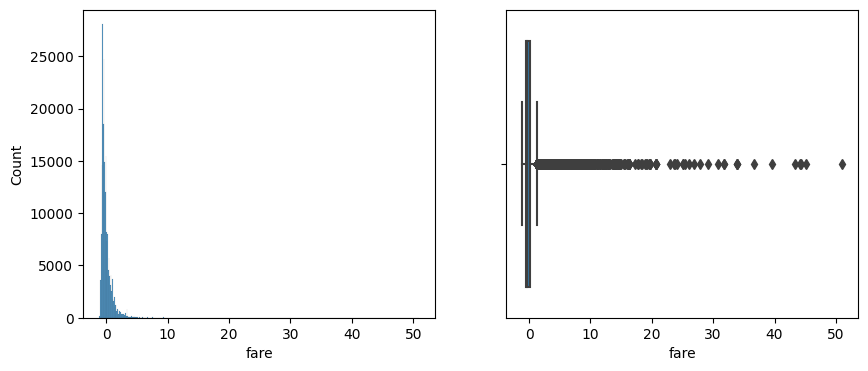

------------------------------
Distribution of Feature After Outlier Removal and Standardization


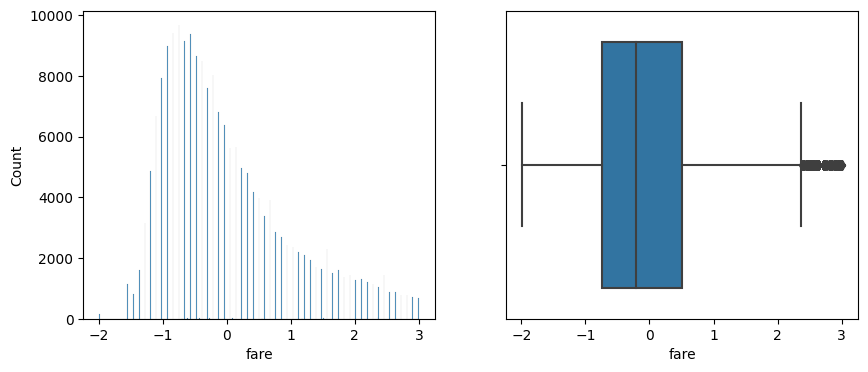

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=train, col='fare')

### `tip`

**Train Set**

Distribution of Raw Feature


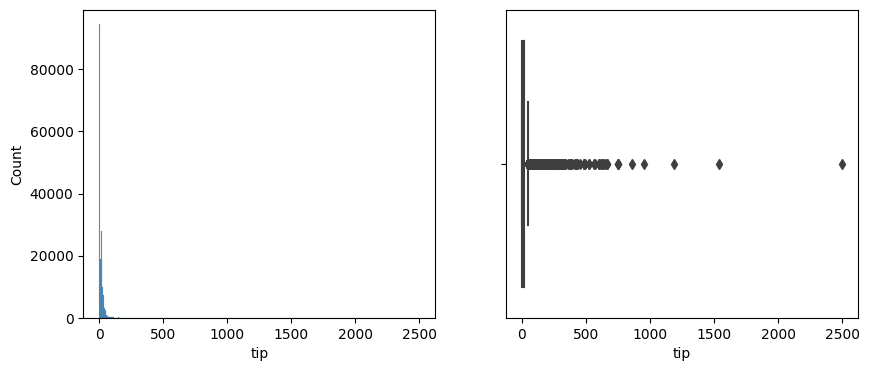

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -30.0 | IQR: 20.0 | Upper IQR: 50.0
% of Outliers: 3.229


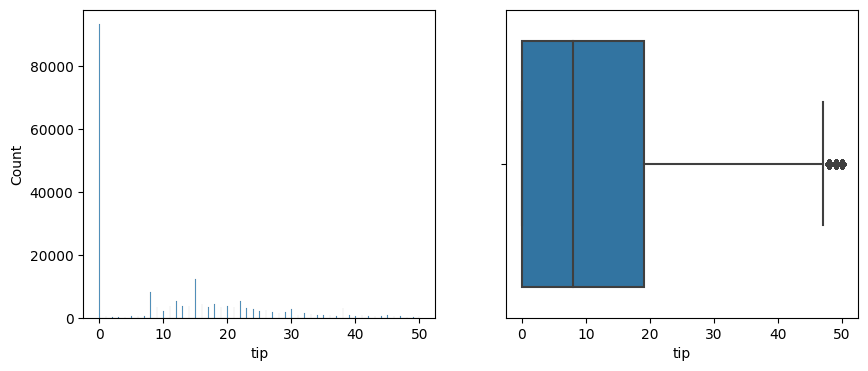

------------------------------
Distribution of Feature After Standardization


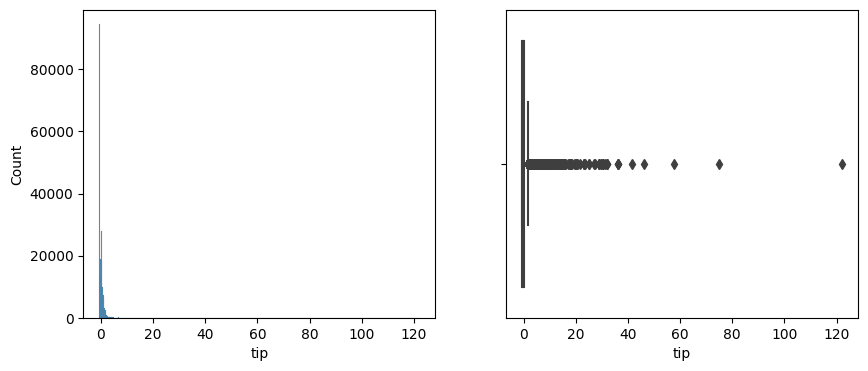

------------------------------
Distribution of Feature After Outlier Removal and Standardization


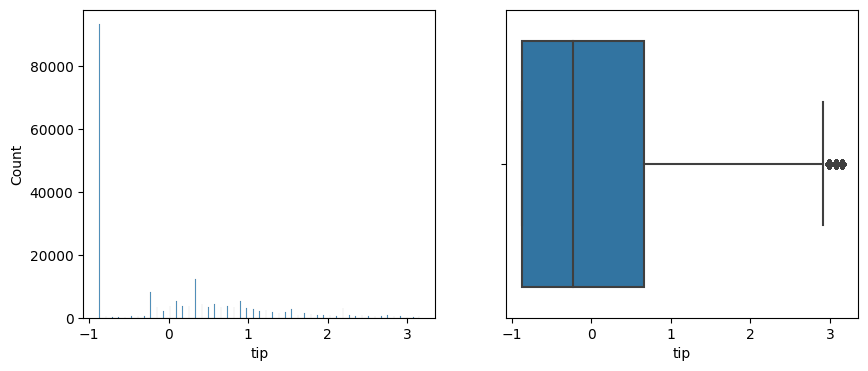

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=train, col='tip')

**Test Set**

Distribution of Raw Feature


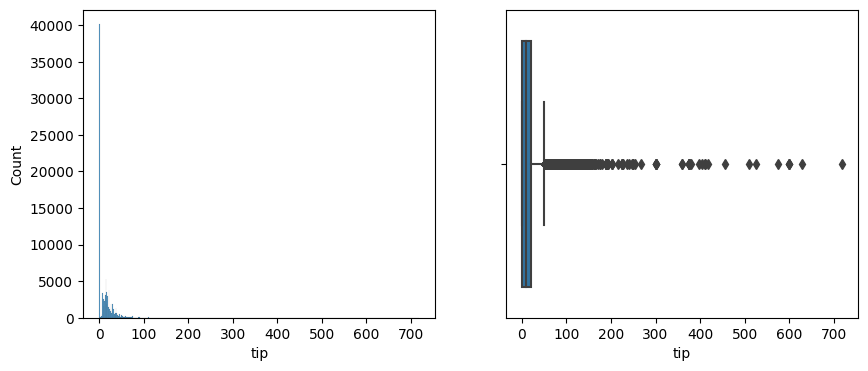

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -30.0 | IQR: 20.0 | Upper IQR: 50.0
% of Outliers: 3.154


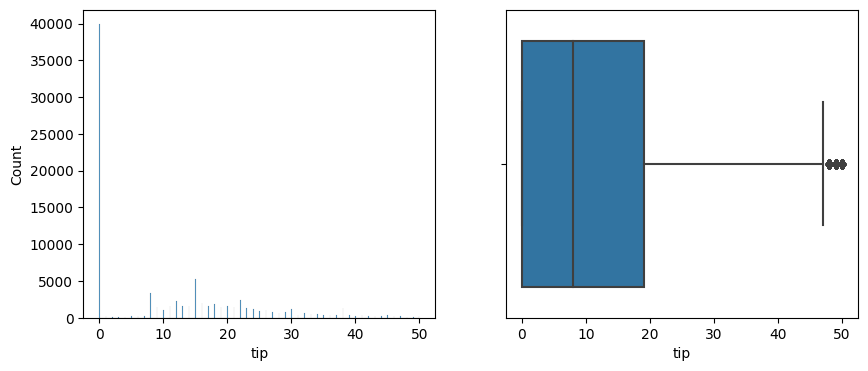

------------------------------
Distribution of Feature After Standardization


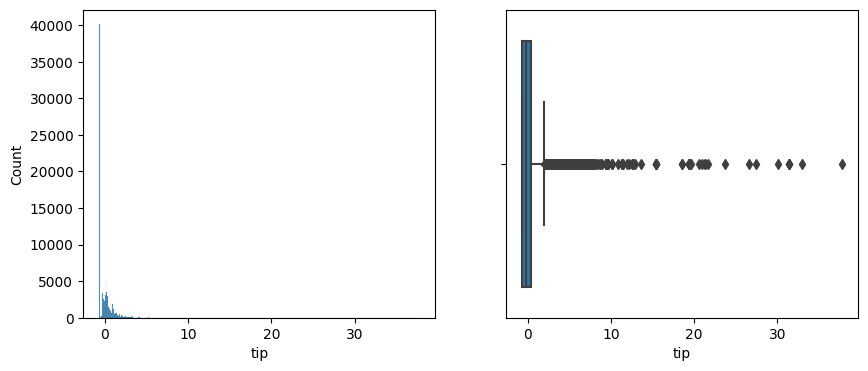

------------------------------
Distribution of Feature After Outlier Removal and Standardization


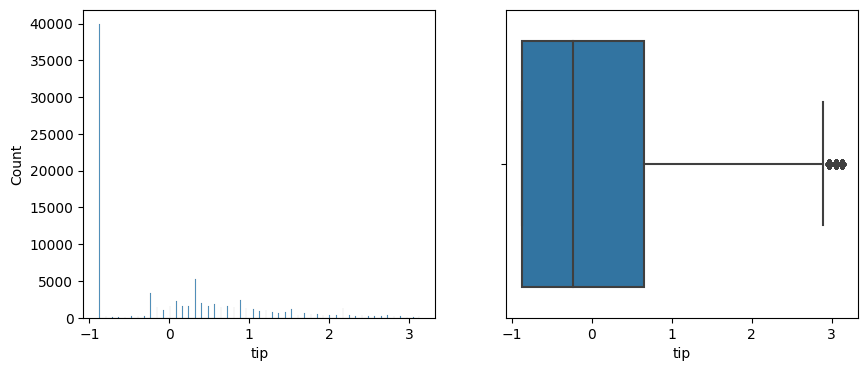

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=test, col='tip')

### `miscellaneous_fees`

**Train Set**

Distribution of Raw Feature


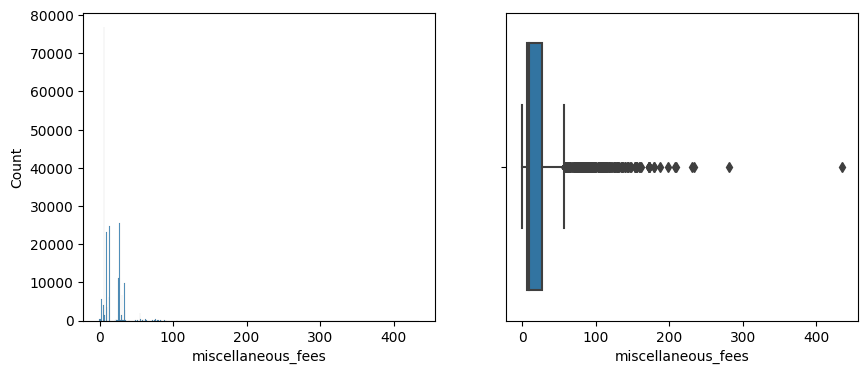

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -24.675000000000026 | IQR: 20.450000000000017 | Upper IQR: 57.12500000000004
% of Outliers: 1.03


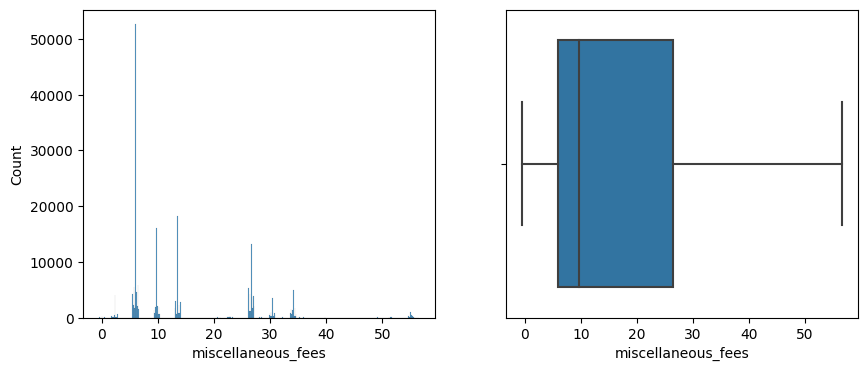

------------------------------
Distribution of Feature After Standardization


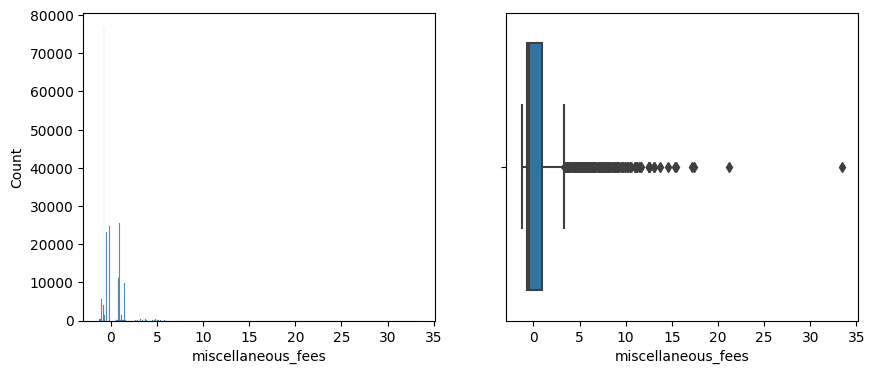

------------------------------
Distribution of Feature After Outlier Removal and Standardization


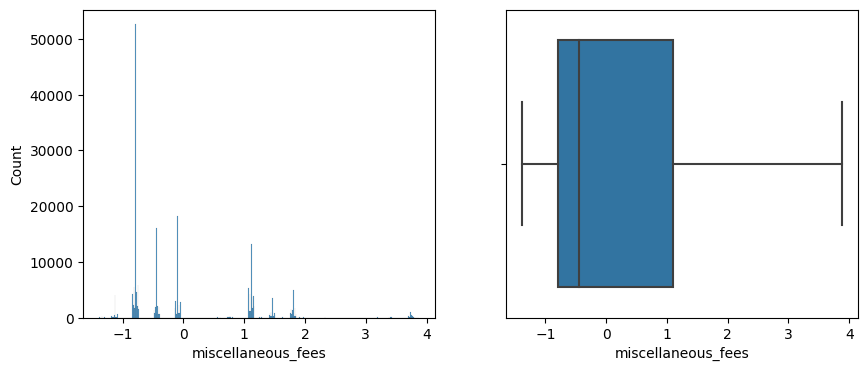

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=train, col='miscellaneous_fees')

**Test Set**

Distribution of Raw Feature


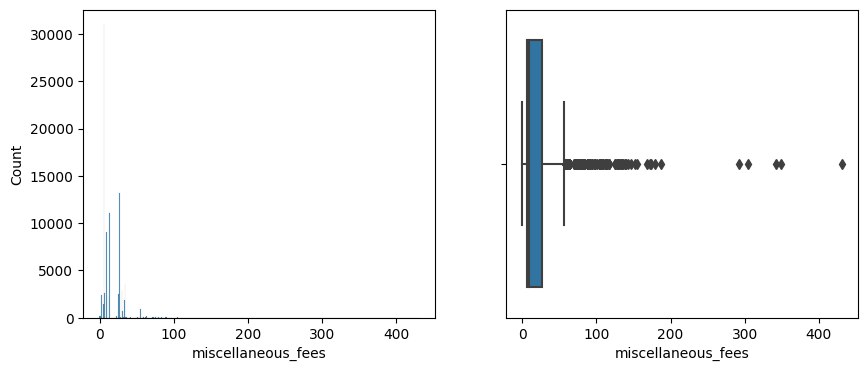

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -24.675000000000026 | IQR: 20.450000000000017 | Upper IQR: 57.12500000000004
% of Outliers: 0.986


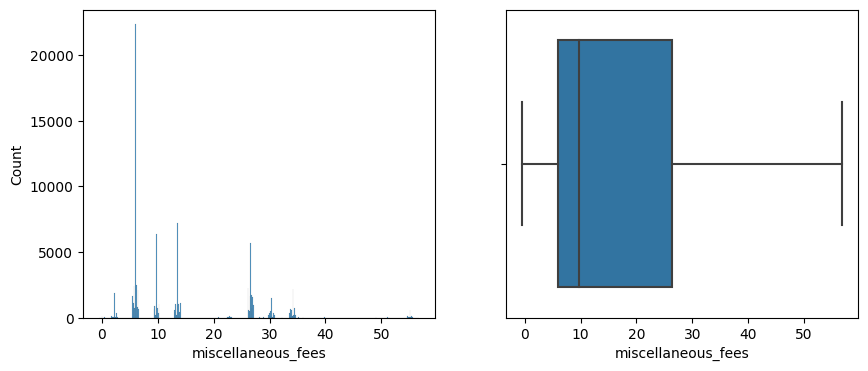

------------------------------
Distribution of Feature After Standardization


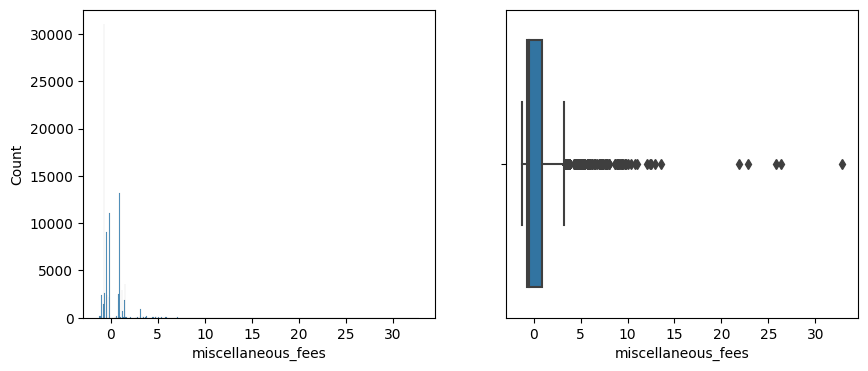

------------------------------
Distribution of Feature After Outlier Removal and Standardization


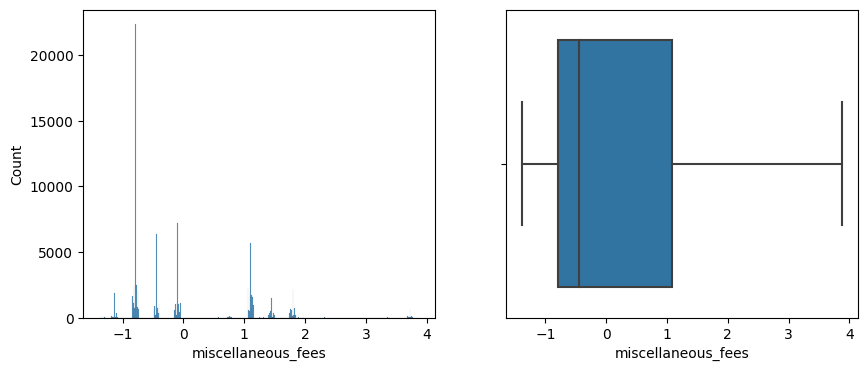

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=test, col='miscellaneous_fees')

### `total_fare`

**Train Set**

Distribution of Raw Feature


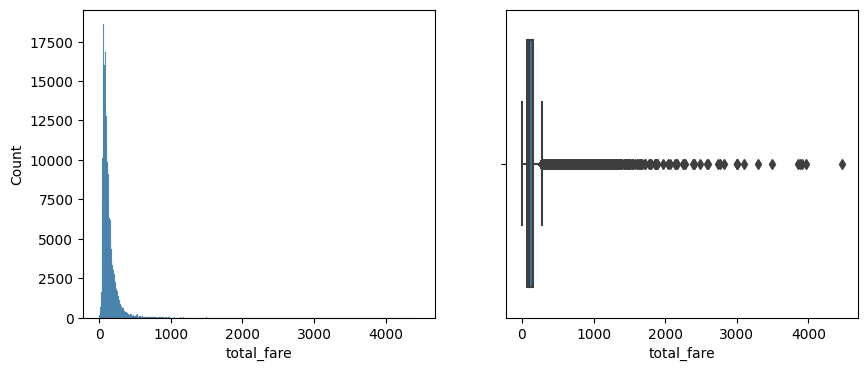

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -52.87500000000003 | IQR: 82.05000000000001 | Upper IQR: 275.32500000000005
% of Outliers: 5.81


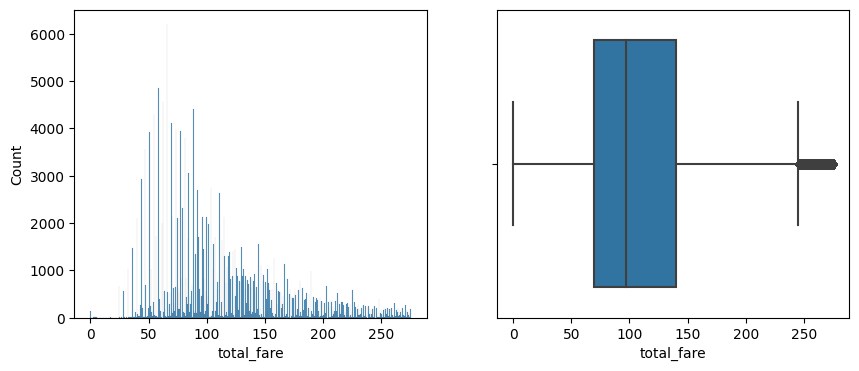

------------------------------
Distribution of Feature After Standardization


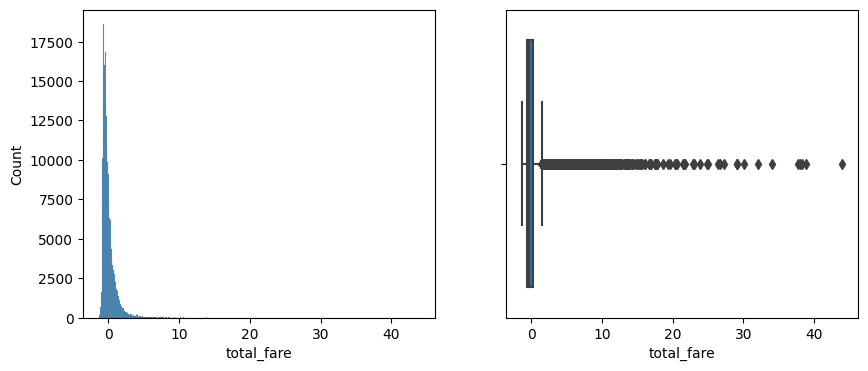

------------------------------
Distribution of Feature After Outlier Removal and Standardization


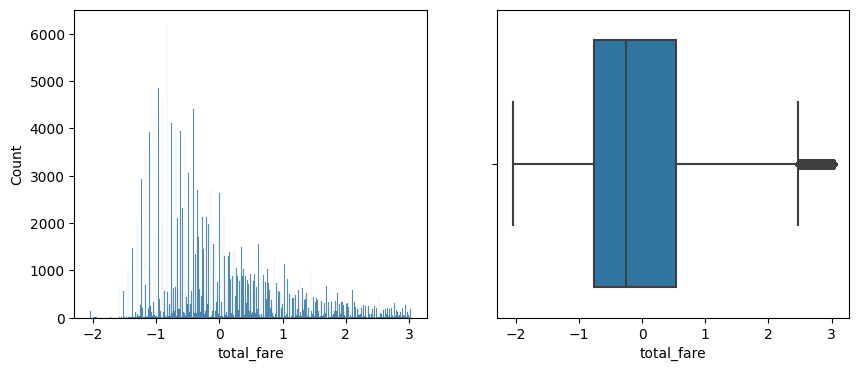

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=train, col='total_fare')

### `num_of_passengers`

**Train Set**

In [ ]:
train['num_of_passengers'].value_counts().sort_index()

0.0       753
1.0    179229
2.0     17896
3.0      2757
4.0       908
5.0      4713
6.0      3382
7.0         2
8.0        25
9.0         8
Name: num_of_passengers, dtype: int64

In [ ]:
((train['num_of_passengers'].value_counts().sort_index()/train.shape[0])*100).round(3)

0.0     0.359
1.0    85.480
2.0     8.535
3.0     1.315
4.0     0.433
5.0     2.248
6.0     1.613
7.0     0.001
8.0     0.012
9.0     0.004
Name: num_of_passengers, dtype: float64

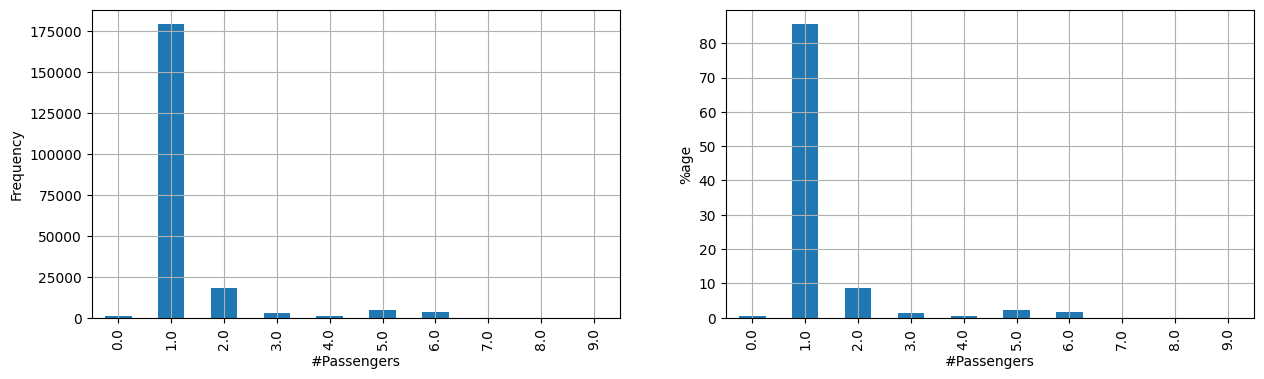

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

train['num_of_passengers'].value_counts().sort_index().plot.bar(ax=ax[0])
ax[0].set(xlabel='#Passengers', ylabel='Frequency')
ax[0].grid()

((train['num_of_passengers'].value_counts().sort_index()/train.shape[0])*100).round(3).plot.bar(ax=ax[1])
ax[1].set(xlabel='#Passengers', ylabel='%age')
ax[1].grid()

plt.show()

**Test Set**

In [ ]:
test['num_of_passengers'].value_counts().sort_index()

0.0      376
1.0    76865
2.0     7705
3.0     1168
4.0      373
5.0     1929
6.0     1424
7.0        4
8.0       14
9.0        3
Name: num_of_passengers, dtype: int64

In [ ]:
((test['num_of_passengers'].value_counts().sort_index()/test.shape[0])*100).round(3)

0.0     0.418
1.0    85.538
2.0     8.574
3.0     1.300
4.0     0.415
5.0     2.147
6.0     1.585
7.0     0.004
8.0     0.016
9.0     0.003
Name: num_of_passengers, dtype: float64

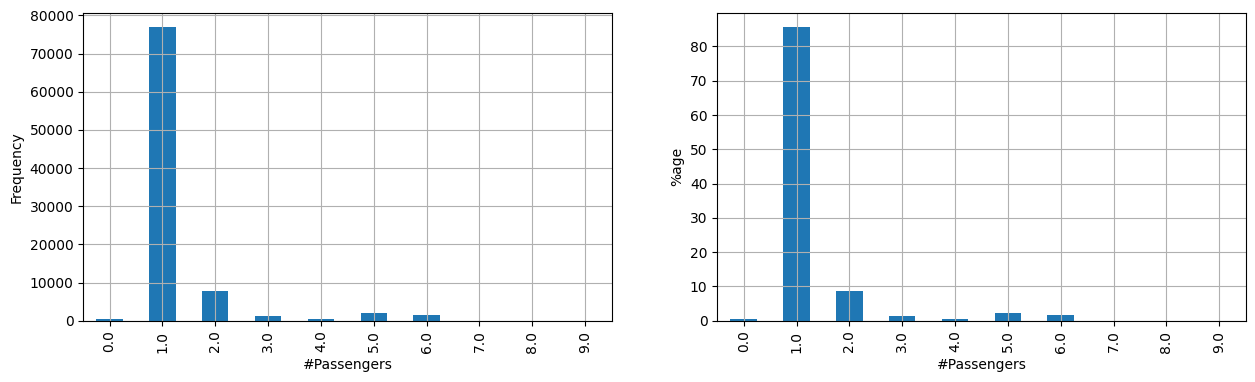

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

test['num_of_passengers'].value_counts().sort_index().plot.bar(ax=ax[0])
ax[0].set(xlabel='#Passengers', ylabel='Frequency')
ax[0].grid()

((test['num_of_passengers'].value_counts().sort_index()/test.shape[0])*100).round(3).plot.bar(ax=ax[1])
ax[1].set(xlabel='#Passengers', ylabel='%age')
ax[1].grid()

plt.show()

### `surge_applied`

**Train Set**

In [ ]:
train['surge_applied'].value_counts()

0    150855
1     58818
Name: surge_applied, dtype: int64

In [ ]:
((train['surge_applied'].value_counts()/train.shape[0])*100).round(3)

0    71.948
1    28.052
Name: surge_applied, dtype: float64

**Test Set**

In [ ]:
test['surge_applied'].value_counts()

0    64495
1    25366
Name: surge_applied, dtype: int64

In [ ]:
((test['surge_applied'].value_counts()/test.shape[0])*100).round(3)

0    71.772
1    28.228
Name: surge_applied, dtype: float64

## Multivariate EDA

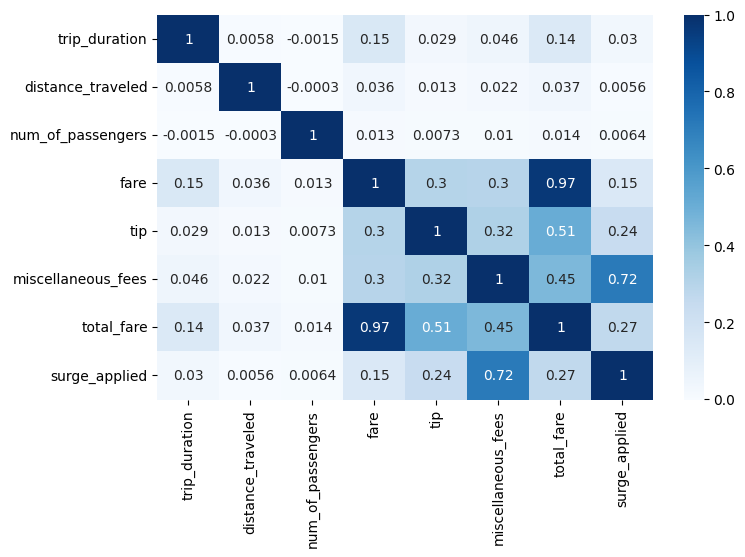

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(train.corr(), annot=True, cmap='Blues', ax=ax)
plt.show()

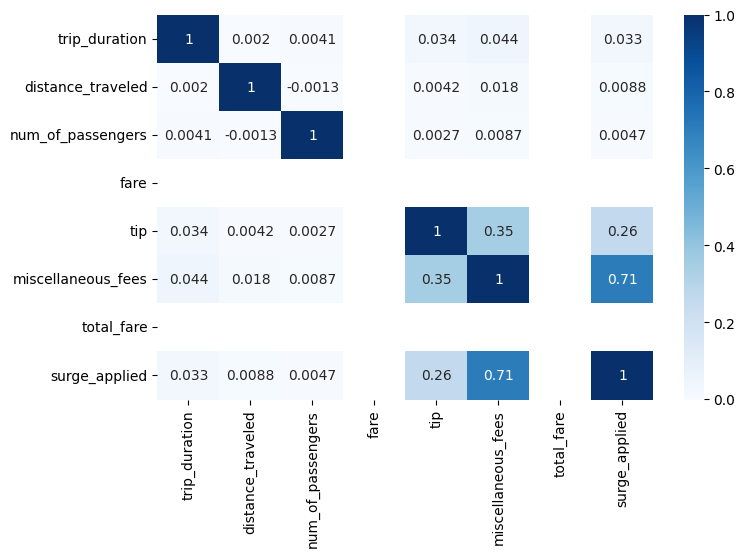

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(test.corr(), annot=True, cmap='Blues', ax=ax)
plt.show()

In [15]:
def pairplot(data, figsize=(20, 20)):
  n_cols = data.shape[1]
  fig, ax = plt.subplots(n_cols, n_cols, figsize=figsize)
  for col1_idx, col1 in enumerate(data.columns):
    for col2_idx, col2 in enumerate(data.columns):
      if col1 == col2:
        sns.histplot(data=data, x=col1, bins=500, ax=ax[col1_idx, col2_idx])
        ax[col1_idx, col2_idx].set(xlabel='', ylabel='')
        ax[col1_idx, col2_idx].grid()
      else:
        sns.scatterplot(data=data, x=col1, y=col2, ax=ax[col1_idx, col2_idx])
        ax[col1_idx, col2_idx].set(xlabel='', ylabel='')
        ax[col1_idx, col2_idx].grid()
  for idx, col in enumerate(data.columns):
    ax[idx, 0].set(ylabel=col)
    ax[n_cols-1, idx].set(xlabel=col)
  plt.show()

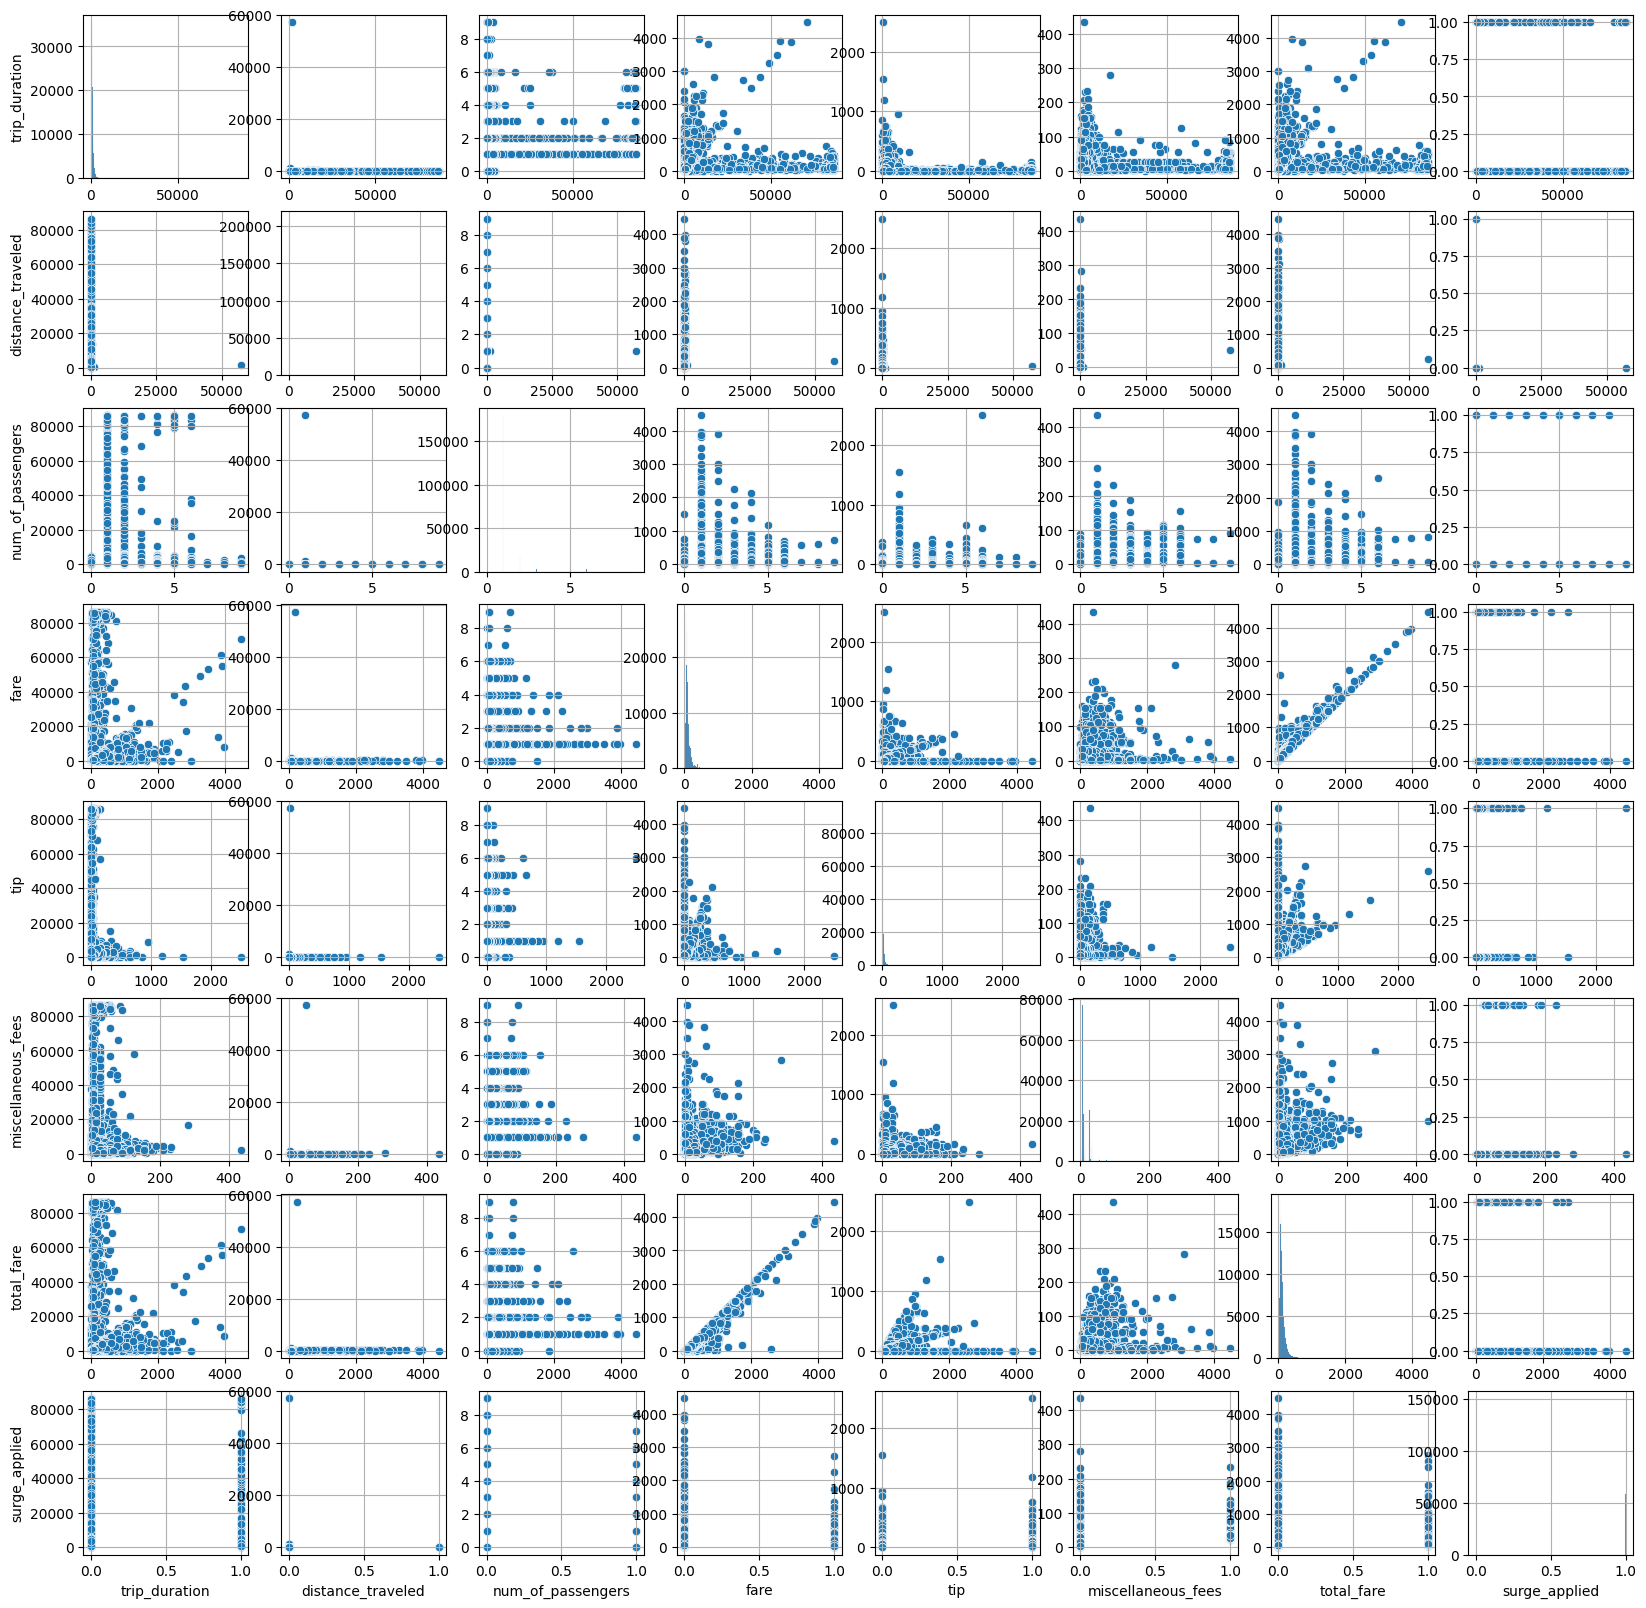

In [16]:
pairplot(data=train)

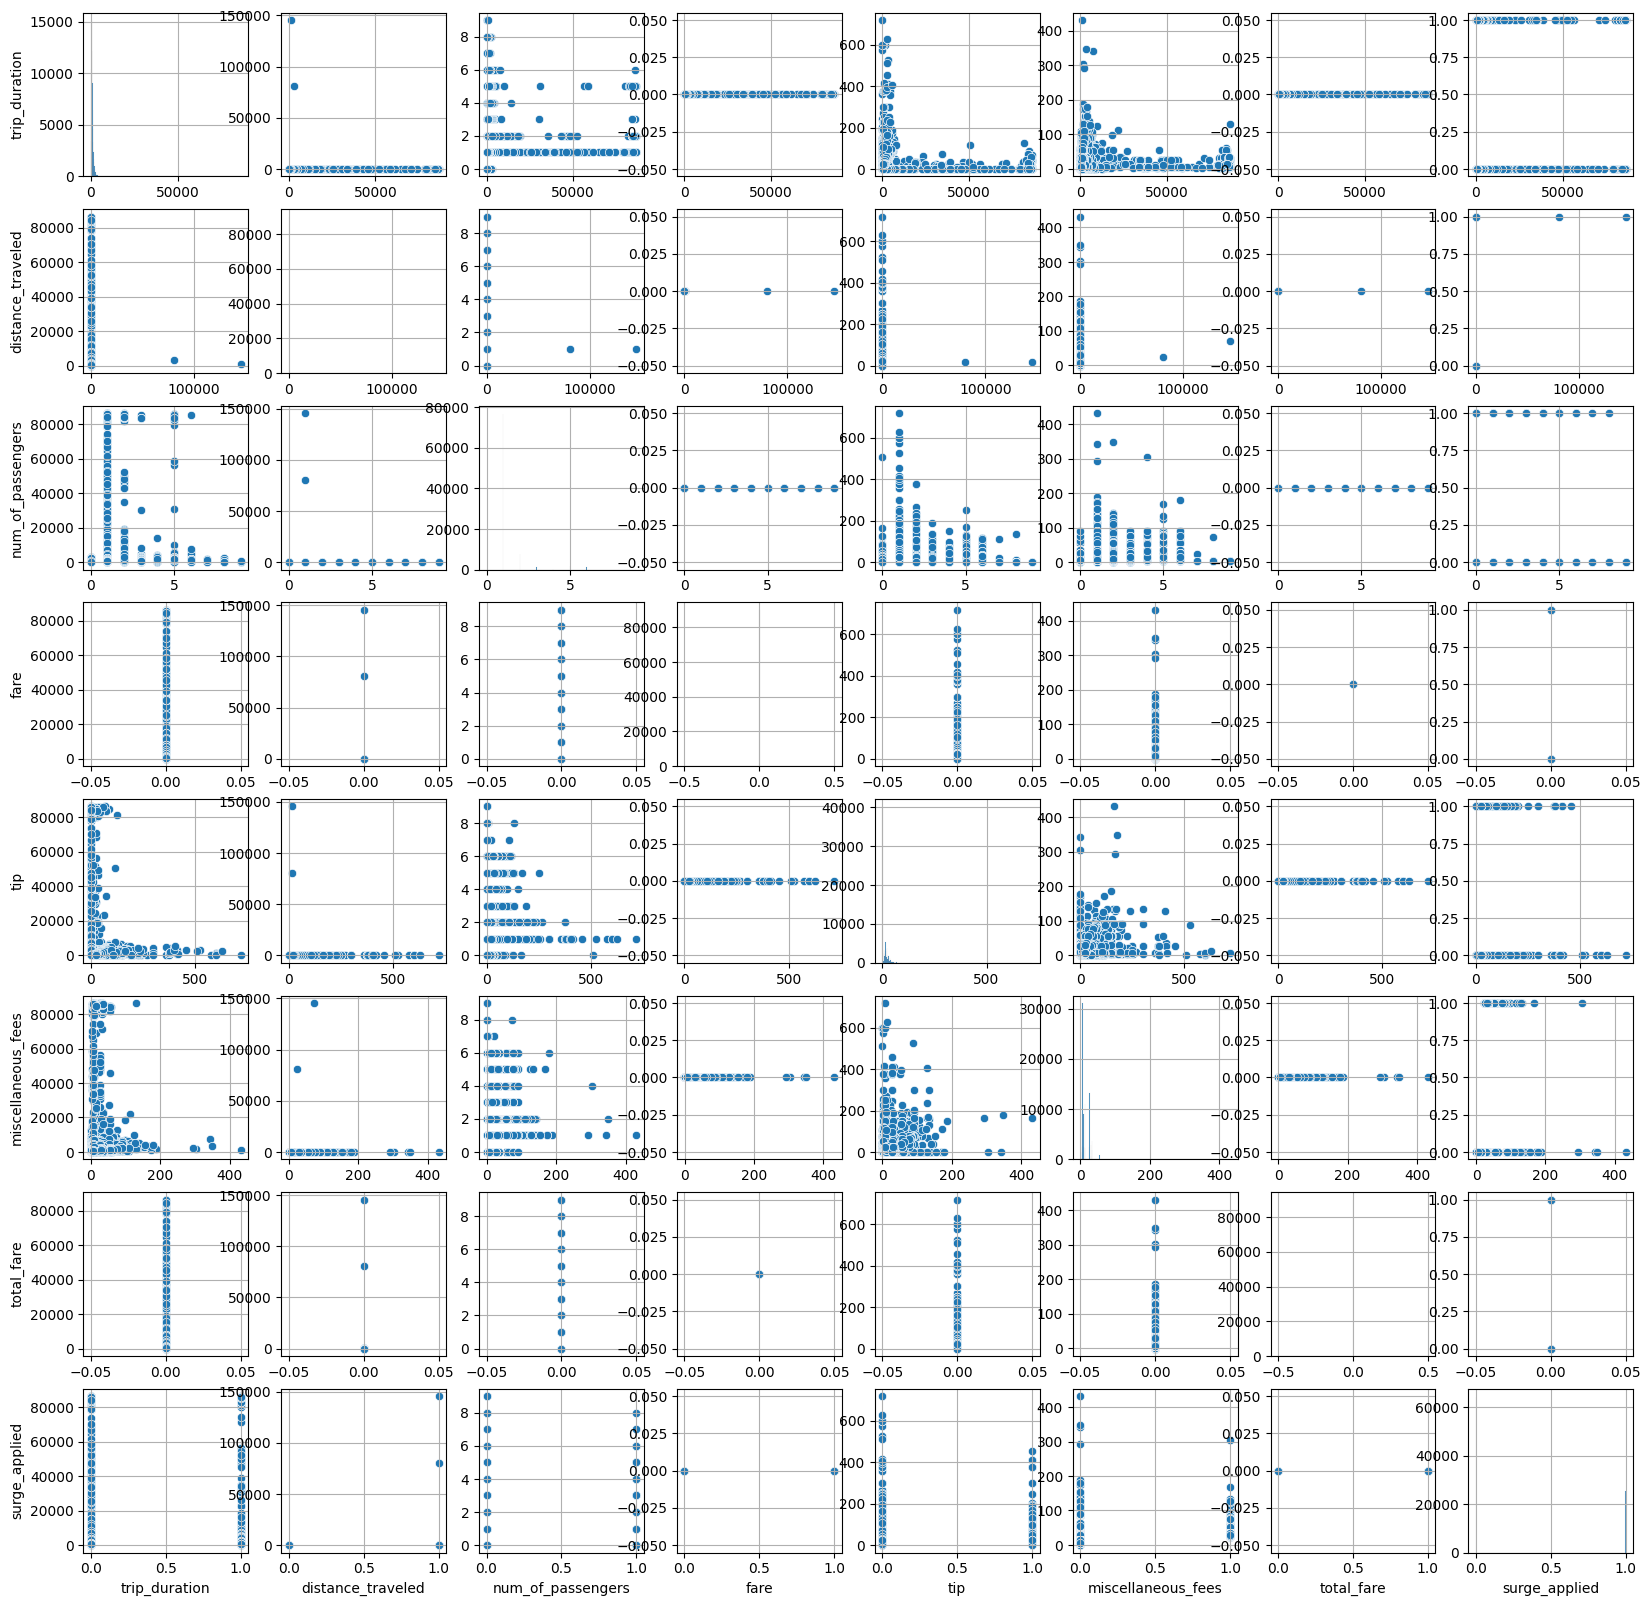

In [18]:
pairplot(data=test)